In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('cardekho.csv')

In [3]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [5]:
missing_values= df.isnull().sum()
print(df)


                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage(km

In [6]:
missing_values_percentage = missing_values / len(df) * 100
print(missing_values_percentage)

name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
dtype: float64


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:

df =df.dropna(subset=['selling_price'])
df.shape


(8128, 12)

##### We can't train a model with target missing values ( selling price ) since that is what we are trying to predict 
##### To ensure that our traning model will train with data that is complete to avoid biasness 

In [9]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [10]:
df['mileage(km/ltr/kg)']=df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())
df.shape


(8128, 12)

In [11]:
missing_value1 = df.isnull().sum()
print(missing_value1)


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64


In [12]:
df['max_power'] = df['max_power'].str.replace('bhp','', regex=False).str.strip()

# Replace empty strings with NaN
df['max_power'] = df['max_power'].replace('', np.nan)

# Convert to numeric safely
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [13]:
df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['seats'].fillna(df['seats'].mode()[0], inplace=True)
df.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_8348\2780457657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df['engine'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8348\2780457657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

(8128, 12)

In [14]:
df.shape

(8128, 12)

In [15]:
missing_values2 = df.isnull().sum()
print(missing_values2)

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


#####  Explain why filling missing values can sometimes be better than dropping rows 

###### Dropping rows makes the sample size   to be skewed limiting the model training
###### One can lose a large chunk of data in the other columns 

In [16]:
# removing duplicates 
df =df.drop_duplicates()
df.shape

(6926, 12)

In [17]:
 # Convert the “year” column into the car’s age
from datetime import datetime
current_year = datetime.now().year
df['car_age'] = current_year - df['year']
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [18]:
# Check the unique values in the “fuel type” column
fuel_type = df['fuel'].unique()
print("fuel:", fuel_type)


fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']


In [19]:
fuel_type_count = df['fuel'].value_counts()
print("fuel type count:", fuel_type_count)

fuel type count: fuel
Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: count, dtype: int64


In [20]:
# Replace inconsistent values in the “transmission” column.
inconsistent_transmissions = df['transmission'].unique()
df['transmission'] = df['transmission'].str.title()
df.head()




,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [21]:

print(df['selling_price'].describe())


count    6.926000e+03
mean     5.172707e+05
std      5.197670e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.335000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


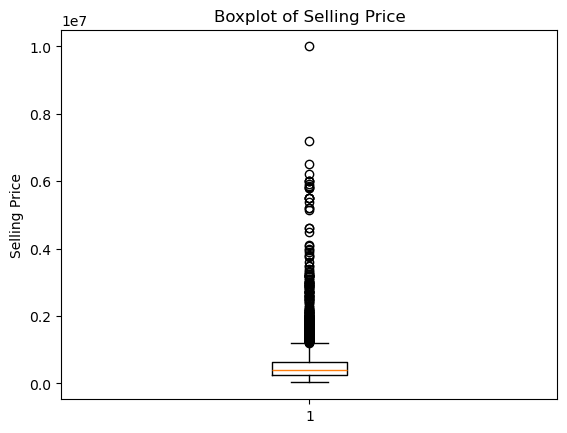

In [22]:
plt.boxplot(df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.ylabel('Selling Price')
plt.show()

##### Explain why outliers can affect model accuracy.
###### it may cause overfitting - the model will fail / extreme /cramm/ and fail to make the correct prediction 


In [23]:
# 10 Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
df = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (6906, 13)


In [24]:
# 11. Standardize the column names so they are all lowercase and contain underscores instead of spaces.

df.columns = (df.columns.str.lower().str.replace(' ', '_' ,regex= False) )
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [25]:
# 12. Check if any numerical columns are stored as strings and convert them to numbers.
print(df.dtypes)

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
car_age                 int64
dtype: object


In [26]:
numerical_columns = ['year','selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power', 'seats','car_age']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
car_age                 int64
dtype: object


In [27]:
#Create a new column for “price per kilometer” by dividing the selling price by the mileage.
df['price_per_km'] = df['selling_price'] / df['mileage(km/ltr/kg)']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [28]:
#14. Ensure the dataset index is properly reset after cleaning
print("Original DataFrame:")
print(df)

df_reset = df.reset_index()



Original DataFrame:
                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
8121  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
8122         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
8123                  Hyundai i20 Magna  2013         320000     110000   
8124              Hyundai Verna CRDi SX  2007         135000     119000   
8125             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  \
0     Diesel  In

In [29]:
print("\nDataFrame after reset_index():")
print(df_reset)


DataFrame after reset_index():
      index                               name  year  selling_price  \
0         0             Maruti Swift Dzire VDI  2014         450000   
1         1       Skoda Rapid 1.5 TDI Ambition  2014         370000   
2         2           Honda City 2017-2020 EXi  2006         158000   
3         3          Hyundai i20 Sportz Diesel  2010         225000   
4         4             Maruti Swift VXI BSIII  2007         130000   
...     ...                                ...   ...            ...   
6901   8121  Maruti Wagon R VXI BS IV with ABS  2013         260000   
6902   8122         Hyundai i20 Magna 1.4 CRDi  2014         475000   
6903   8123                  Hyundai i20 Magna  2013         320000   
6904   8124              Hyundai Verna CRDi SX  2007         135000   
6905   8125             Maruti Swift Dzire ZDi  2009         382000   

      km_driven    fuel seller_type transmission                 owner  \
0        145500  Diesel  Individual      

In [30]:
 # 14Save your cleaned dataset as a new CSV file called cleaned_cars.csv.
df_reset.to_csv('cleaned_cars.csv', index=False)
pd.read_csv('cleaned_cars.csv')

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,12,13756.613757
6902,8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11,21073.646850
6903,8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12,17297.297297
6904,8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18,8035.714286


In [31]:
#16. Find the average selling price of cars in the dataset.
average_selling_price=df['selling_price'].mean()
print(average_selling_price)

501378.18114682887


In [32]:
#17. Find the most common fuel type in the dataset.
most_common_fuel = df['fuel'].mode()[0]
print( most_common_fuel)

Diesel


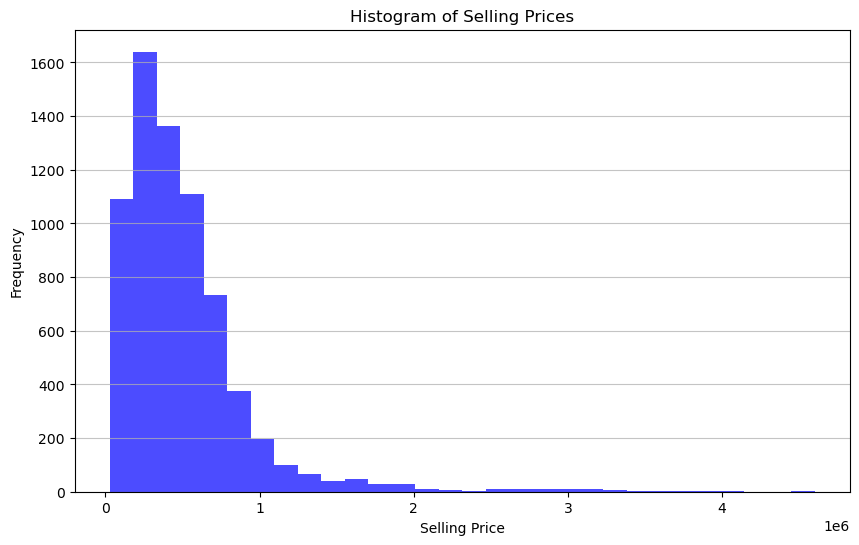

In [33]:
# 18. Plot a histogram of the selling prices.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


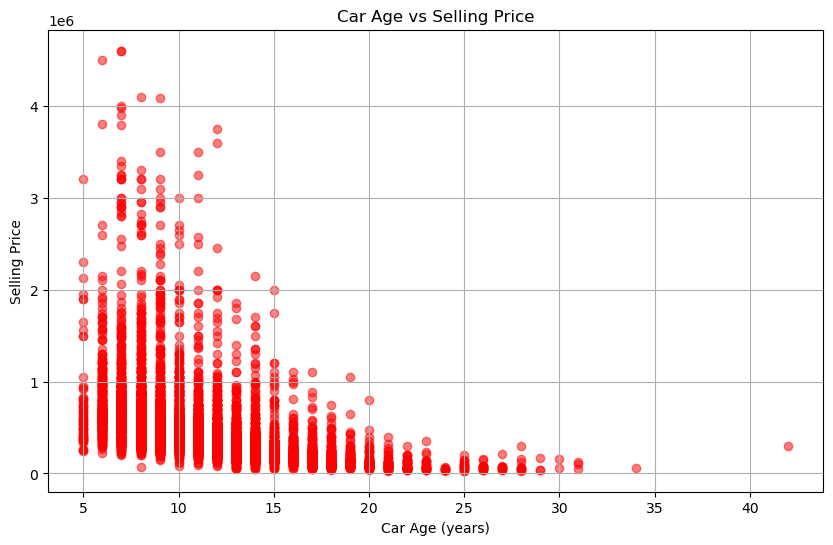

In [34]:
# Plot the relationship between car age and selling price using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(df['car_age'], df['selling_price'], alpha=0.5, color='red' )
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.grid()
plt.show()

In [35]:
# 20. Group cars by fuel type and find the average selling price for each group.
average_price_by_fuel = df.groupby('fuel')['selling_price'].mean()
print(average_price_by_fuel)

fuel
CNG       300499.946429
Diesel    620448.482224
LPG       200421.052632
Petrol    363717.339629
Name: selling_price, dtype: float64


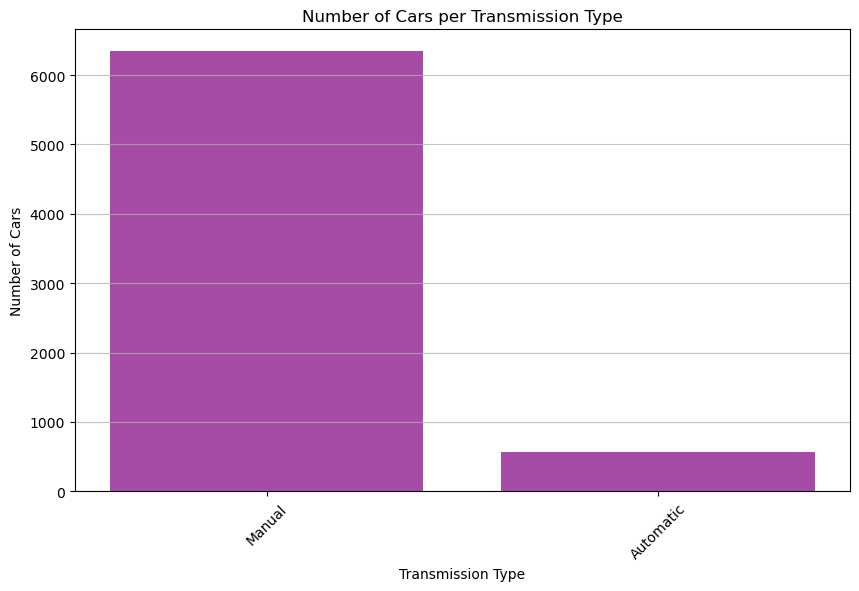

In [36]:
# 21. Plot a bar chart showing the number of cars per transmission type.
transission_counts=df['transmission'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(transission_counts.index, transission_counts.values, color='purple', alpha=0.7)
plt.title('Number of Cars per Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [37]:
# 22. Find the car with the highest mileage in the dataset.
highest_mileage_car = df.loc[df['mileage(km/ltr/kg)'].idxmax()]
print(highest_mileage_car)

name                  Maruti Alto 800 CNG LXI Optional
year                                              2019
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
car_age                                              6
price_per_km                               9868.421053
Name: 35, dtype: object


In [38]:
# 23. Calculate the correlation between mileage and selling price.
correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
print("Correlation between mileage and selling price:", correlation)

Correlation between mileage and selling price: -0.12069849273188767


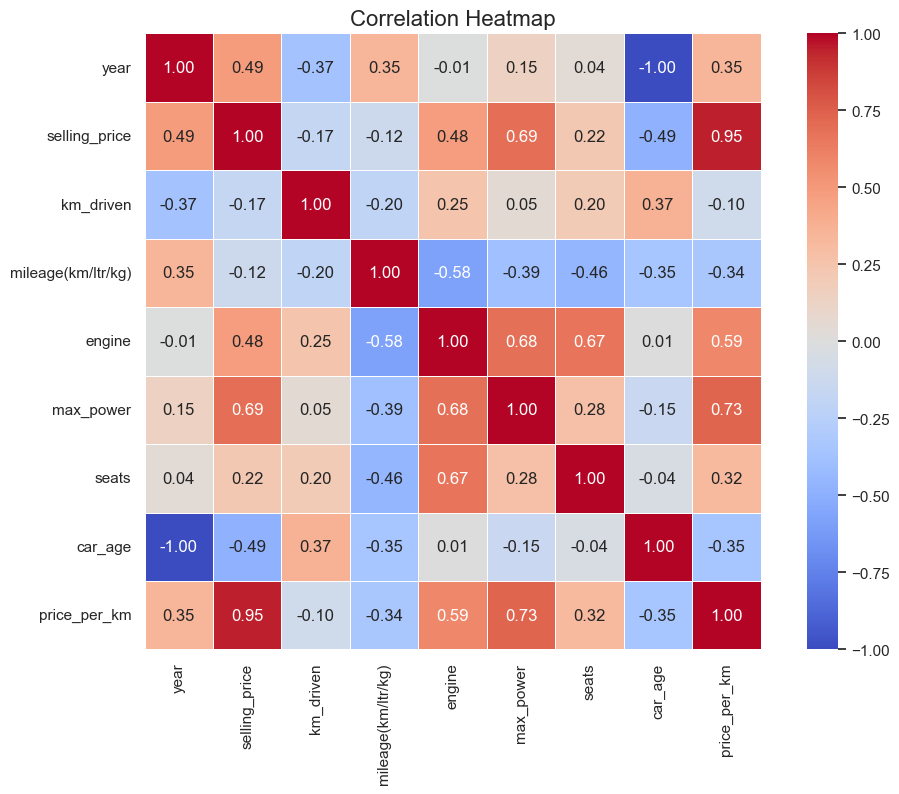

In [39]:
# 24. Plot a heatmap showing the correlations between all numeric columns.
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (numeric columns only)
correlation_matrix = df.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Use white background
sns.set(style='white')

# Plot heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,        # display numbers
    cmap='coolwarm',   # color scheme
    fmt='.2f',         # format numbers
    linewidths=0.5,    # grid line width
    square=True        # make cells square
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [40]:
# 25. Check if manual cars are generally cheaper or more expensive than automatic cars.
price_comparison = df.groupby("transmission")["selling_price"].mean()

print(price_comparison)



transmission
Automatic    1.143215e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


In [41]:
# 26. Find the average selling price for each year of manufacture.
average_price_by_year = df.groupby('year')['selling_price'].mean()
print(average_price_by_year)

year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    708006.173913
2018    825749.553897
2019    795583.291667
2020    786548.338710
Name: selling_price, dtype: float64


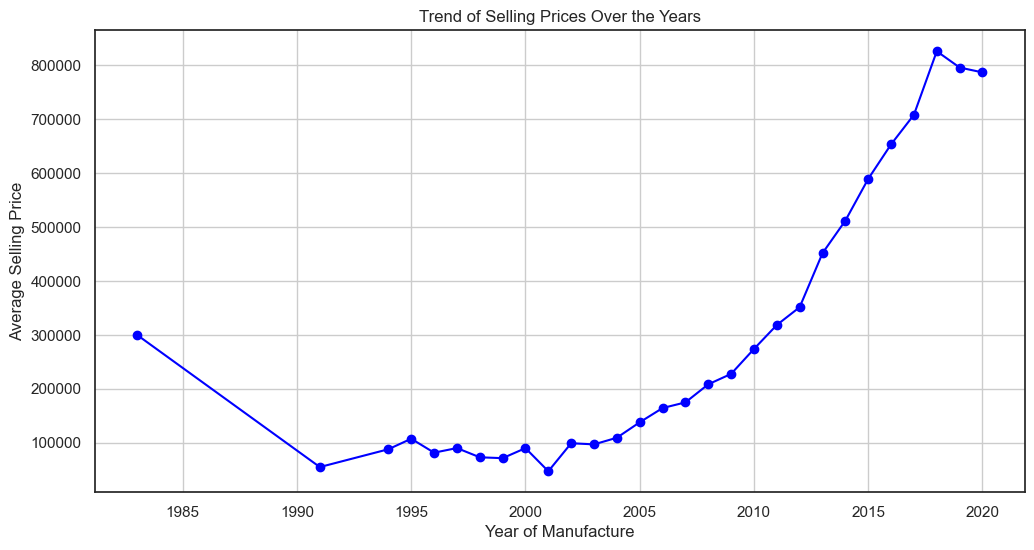

In [42]:
# 27. Plot a line chart showing the trend of selling prices over the years.
plt.figure(figsize=(12, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o', color='blue')
plt.title('Trend of Selling Prices Over the Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Selling Price')
plt.grid()
plt.show()

In [43]:
# 28. Find the most expensive car for each fuel type
most_expensive_cars = df.loc[df.groupby('fuel')['selling_price'].idxmax()]
print(most_expensive_cars[['fuel', 'selling_price', 'name']])

        fuel  selling_price                                      name
5749     CNG         545000     Maruti Ertiga VXI CNG Limited Edition
288   Diesel        4600000  Mercedes-Benz GL-Class 220d 4MATIC Sport
3042     LPG         375000               Hyundai i10 Sportz 1.1L LPG
134   Petrol        4100000           Jeep Wrangler 2016-2019 3.6 4X4


In [44]:
#  Find out which brand appears most frequently in the dataset.
most_frequent_brand = df['name'].str.split(' ', n=1, expand=True)[0].value_counts().idxmax()
print("Most frequent brand:", most_frequent_brand)

Most frequent brand: Maruti


In [45]:
#  Check the top 5 most common combinations of fuel type and transmission.
top_combinations = df.groupby(['fuel', 'transmission']).size().nlargest(5)
print(top_combinations)


fuel    transmission
Diesel  Manual          3457
Petrol  Manual          2791
Diesel  Automatic        284
Petrol  Automatic        280
CNG     Manual            56
dtype: int64


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6906 non-null   float64
 10  max_power           6906 non-null   float64
 11  seats               6906 non-null   float64
 12  car_age             6906 non-null   int64  
 13  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 1.0+ MB


In [47]:
# 31. What are the main assumptions of Linear Regression, and how can you check them using this dataset?
# Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors). Then, write code to verify at least three of these assumptions using visualizations or statistics
# Target

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[['year', 'km_driven', 'engine', 'max_power', 'seats']]   # independent vars
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)





LinearRegression()

In [48]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -78634255.03800951
Coefficients: [ 3.89382349e+04 -6.63002040e-01  1.33753432e+02  7.59802426e+03
 -1.21872896e+04]


In [49]:
y_pred = model.predict(X_train)
residuals = y_train - y_pred

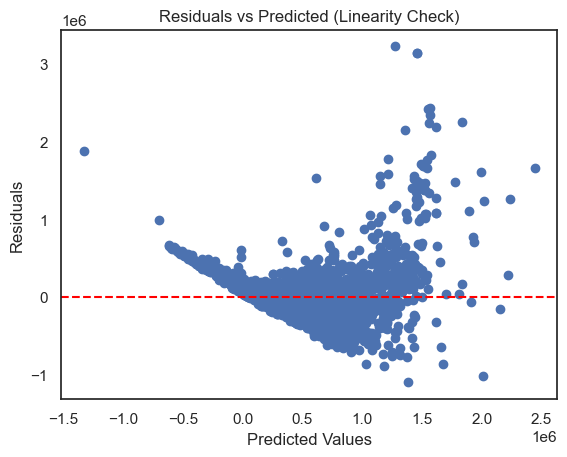

In [50]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linearity Check)")
plt.show()

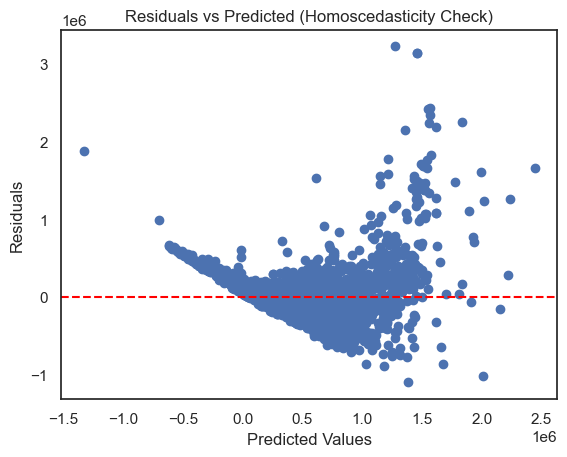

In [51]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Homoscedasticity Check)")
plt.show()

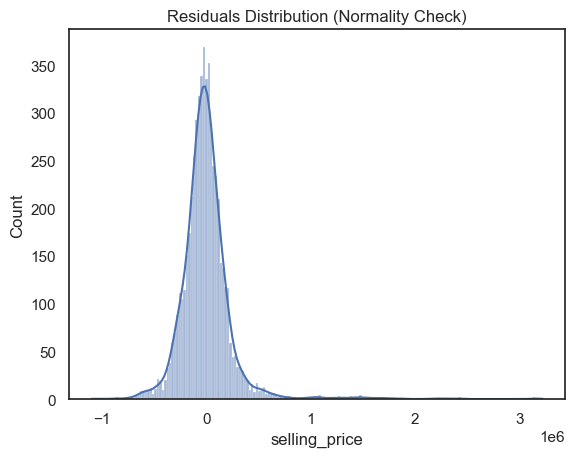

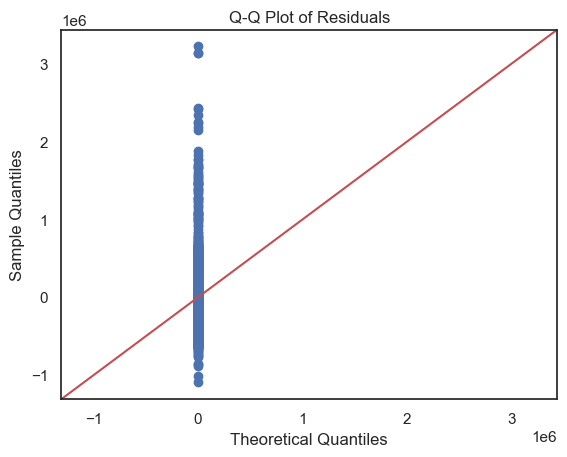

Shapiro-Wilk Test Statistic: 0.7682737940526493  p-value: 1.6081166566948736e-66


c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5524.
  res = hypotest_fun_out(*samples, **kwds)


In [52]:
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Normality Check)")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test[0], " p-value:", shapiro_test[1])


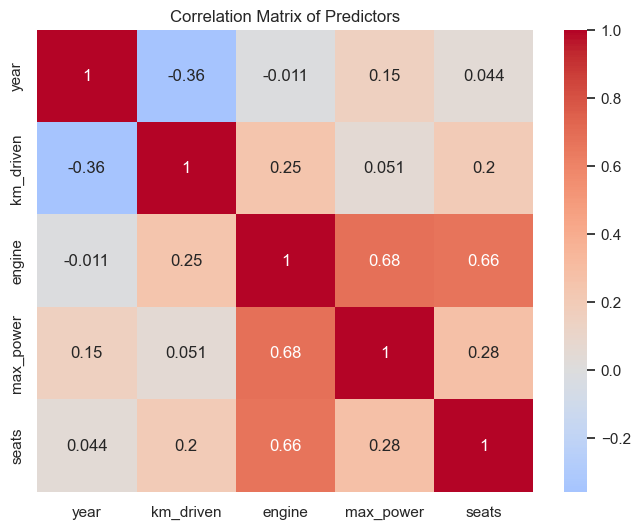

     feature       VIF
0       year  1.216144
1  km_driven  1.245704
2     engine  3.724343
3  max_power  2.252283
4      seats  2.041774


In [53]:
corr = X_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Predictors")
plt.show()

# Variance Inflation Factor (VIF)
X_vif = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X_train.columns))]

print(vif_data)

In [54]:
# Train a Linear Regression model to predict the car’s selling price using selected features.
# Split the dataset into train/test sets, train the model, and print the coefficients and intercept.

X = df[['year', 'km_driven', 'engine', 'max_power', 'seats']]   # independent vars
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -78634255.03800951
Coefficients: [ 3.89382349e+04 -6.63002040e-01  1.33753432e+02  7.59802426e+03
 -1.21872896e+04]


In [55]:
# 33Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).
# Also, explain in your own words what each metric tells you about the model’s performance.
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.6406319565752171
Mean Squared Error: 65229558074.12589


In [56]:
#34. Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
# Explain what Lasso Regression does differently and why it can be useful when you have many features.
# Ridge Model
from sklearn.linear_model import Ridge, Lasso
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Compare performance
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression R²:", r2_score(y_test, lr_pred))

print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge Regression R²:", r2_score(y_test, ridge_pred))

print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso Regression R²:", r2_score(y_test, lasso_pred))

Linear Regression MSE: 65351802108.87122
Linear Regression R²: 0.639958479690139
Ridge Regression MSE: 65351742418.654755
Ridge Regression R²: 0.6399588085403862
Lasso Regression MSE: 65351800189.77783
Lasso Regression R²: 0.639958490262966


In [57]:
#35. Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.
# Discuss why Ridge might perform better or worse in certain cases.
# Ridge Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)   # alpha = regularization strength
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Compare performance
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression R²:", r2_score(y_test, lr_pred))

print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge Regression R²:", r2_score(y_test, ridge_pred))

print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso Regression R²:", r2_score(y_test, lasso_pred))

Linear Regression MSE: 65351802108.87122
Linear Regression R²: 0.639958479690139
Ridge Regression MSE: 65351742418.654755
Ridge Regression R²: 0.6399588085403862
Lasso Regression MSE: 65351800189.77783
Lasso Regression R²: 0.639958490262966


In [58]:
#Use cross-validation to evaluate your Ridge Regression model.
# Explain why cross-validation gives a better estimate of model performance than a single train-test split
from sklearn.model_selection import cross_val_score
ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())


Cross-validated MSE: 66525063368.187645


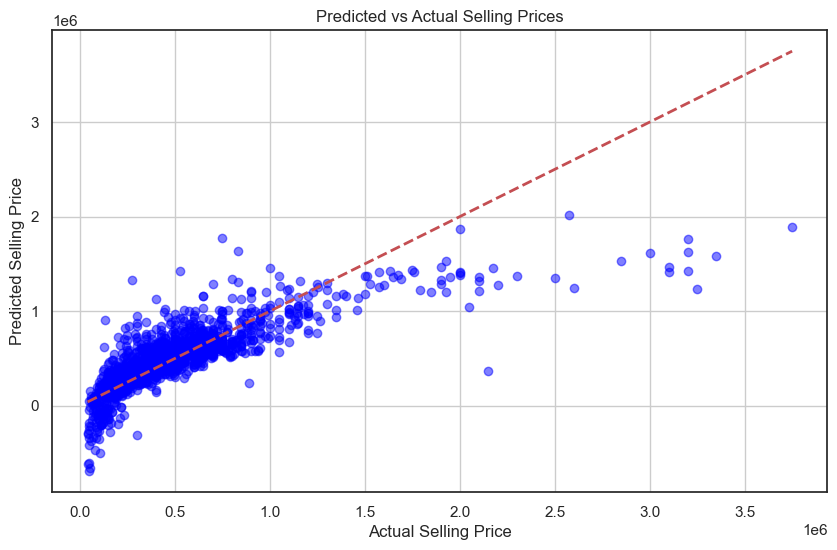

In [59]:
#37. Plot the predicted vs actual prices for your best-performing model.
# Discuss what the plot reveals about the accuracy of your predictions.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid()
plt.show()


In [60]:
#38. Use GridSearchCV to find the best alpha value for Ridge Regression.
# Explain what alpha does in Ridge/Lasso regression and why tuning it is important
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best alpha value from GridSearchCV:", grid_search.best_params_)


Best alpha value from GridSearchCV: {'alpha': 0.1}


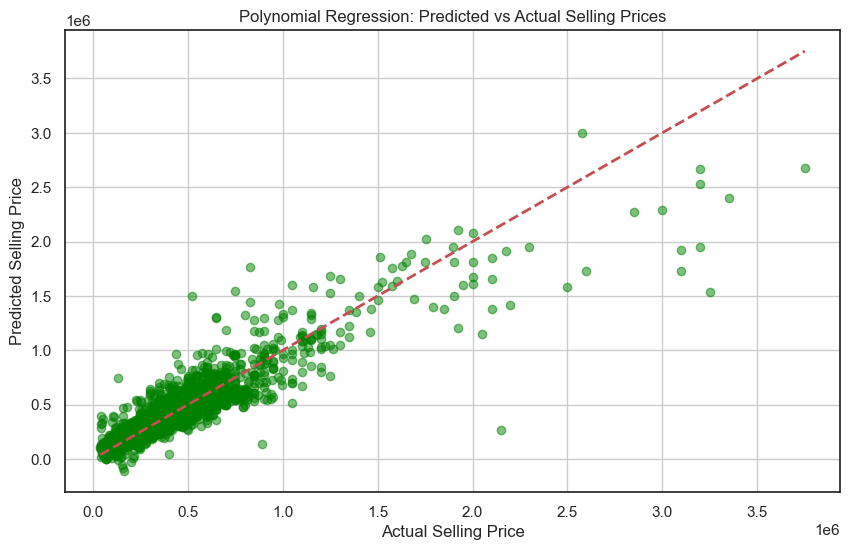

Linear Regression MSE: 65351802108.87122
Polynomial Regression MSE: 35618853142.403496


In [61]:
#39. Try Polynomial Regression on the dataset.
# Compare the results with Linear Regression and explain when polynomial regression might be useful.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_poly_pred = poly_model.predict(poly.transform(X_test))
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_poly_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Polynomial Regression: Predicted vs Actual Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid()
plt.show()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_lin_pred = lin_reg.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_lin_pred))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_poly_pred))